In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import preprocessing

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('TITANIC.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(df[df["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [7]:
df["Age"] = df[["Age", "Pclass"]].apply(add_age,axis=1)

In [8]:
df = df.drop(['Ticket', 'Cabin','PassengerId'] ,axis = 1)

In [9]:
df = df.dropna(subset = ['Embarked'] , how = 'any')

In [10]:
df.shape

(889, 9)

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.206040,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.177747,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [13]:
a,b =df['Survived'].value_counts()
print("Percentage of survived : ",(b / (b+a)) * 100)
print("Percentage of died : ",(a / (b+a)) * 100)

Percentage of survived :  38.24521934758155
Percentage of died :  61.754780652418454


In [14]:
df['Sex'] = df['Sex'].replace(['male' , 'female'] , [0,1])

In [15]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 889, dtype: int64

In [16]:
x = df['Age'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_age = min_max_scaler.fit_transform(x)
df['Age'] = x_age

x = df['Fare'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_age = min_max_scaler.fit_transform(x)
df['Fare'] = x_age

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,0.271174,1,0,0.014151,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,0.139136,C
2,1,3,"Heikkinen, Miss. Laina",1,0.321438,0,0,0.015469,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,0.103644,S
4,0,3,"Allen, Mr. William Henry",0,0.434531,0,0,0.015713,S


In [18]:
df = pd.get_dummies(df , columns = ['Embarked' ,  ] ,drop_first =True)

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,0.271174,1,0,0.014151,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,0.139136,0,0
2,1,3,"Heikkinen, Miss. Laina",1,0.321438,0,0,0.015469,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,0.103644,0,1
4,0,3,"Allen, Mr. William Henry",0,0.434531,0,0,0.015713,0,1


In [20]:
data=pd.DataFrame(df,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S','Survived',])
data

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,Survived
0,3,0.271174,1,0,0.014151,0,0,1,0
1,1,0.472229,1,0,0.139136,1,0,0,1
2,3,0.321438,0,0,0.015469,1,0,1,1
3,1,0.434531,1,0,0.103644,1,0,1,1
4,3,0.434531,0,0,0.015713,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.025374,0,0,1,0
887,1,0.233476,0,0,0.058556,1,0,1,1
888,3,0.308872,1,2,0.045771,1,0,1,0
889,1,0.321438,0,0,0.058556,0,0,0,1


In [21]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,Survived
0,3,0.271174,1,0,0.014151,0,0,1,0
1,1,0.472229,1,0,0.139136,1,0,0,1
2,3,0.321438,0,0,0.015469,1,0,1,1
3,1,0.434531,1,0,0.103644,1,0,1,1
4,3,0.434531,0,0,0.015713,0,0,1,0


### Defining variables x and y

In [22]:
x = data.iloc[:,:-1].values
print(x.shape)

(889, 8)


In [23]:
y = data.iloc[:,-1].values
print(y.shape)

(889,)


In [24]:
print(x)

[[3.         0.27117366 1.         ... 0.         0.         1.        ]
 [1.         0.4722292  1.         ... 1.         0.         0.        ]
 [3.         0.32143755 0.         ... 1.         0.         1.        ]
 ...
 [3.         0.30887158 1.         ... 1.         0.         1.        ]
 [1.         0.32143755 0.         ... 0.         0.         0.        ]
 [3.         0.39683338 0.         ... 0.         1.         0.        ]]


In [25]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 

### Splitting data into test set and train set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
y_train.shape

(622,)

In [28]:
pd.DataFrame([x_train.shape , x_test.shape , y_train.shape , y_test.shape], index=['x_train','x_test','y_train','y_test'],columns=['rows','columns'] )

,rows,columns
x_train,622,8.0
x_test,267,8.0
y_train,622,NaN
y_test,267,NaN


### Scaling independent variables

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Building the Model

In [30]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [32]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int64)

### Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[134  23]
 [ 36  74]]


,0
TP,74
TN,134
FP,23
FN,36


#### Accuracy

In [34]:
from sklearn import metrics as met
accuracy=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy*100)

classification accuracy: 77.90262172284645


# Error

In [35]:
print("classification error is :",100*(1-accuracy))

classification error is : 22.097378277153556


#### TPR / TNR / FPR / FNR

In [36]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR','TNR','FPR','FNR'])

,0
TPR,67.272727
TNR,85.350318
FPR,14.649682
FNR,32.727273


In [37]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.762887
F1_score,0.714976
roc_auc,0.763115


### Accuracy of 77.9% at 0.3 test split and random state 0

# KNN
### split data

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [40]:
pd.DataFrame([x_train.shape,x_test.shape,y_train.shape,y_test.shape],index=['xtrain','xtest','ytrain','ytest'])

,0,1
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### building model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(x_test)

### Confusion matric evaluation

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)

array([[122,  16],
       [ 23,  62]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.8251121076233184

In [45]:
error = []
accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

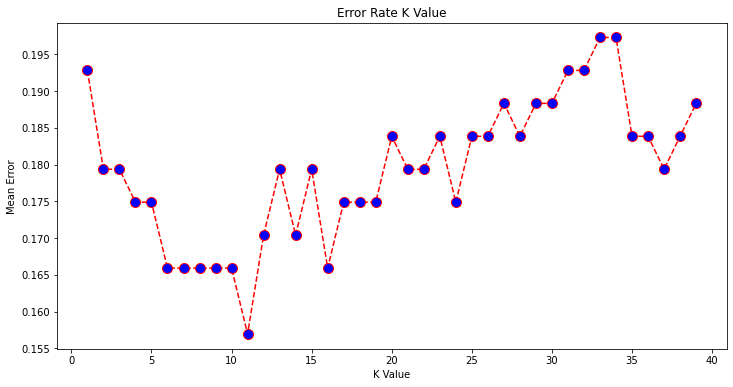

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

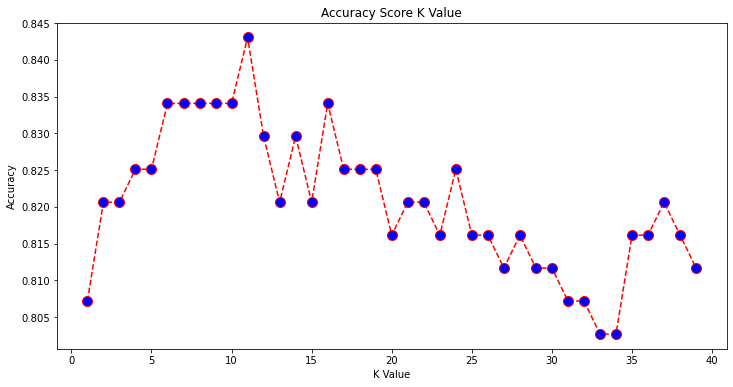

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred1 = knn.predict(x_test)

In [50]:
confusion_matrix(y_test, y_pred1)

array([[123,  15],
       [ 20,  65]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred1)

0.8430493273542601

## max accuraccy is 84.3%

## Decision Tree
### Splitting data

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [56]:
### Scaling Data

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [58]:
### Building Model

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
cf=DecisionTreeClassifier()
cf=cf.fit(x_train,y_train)
y_pred=cf.predict(x_test)

In [61]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [62]:

from sklearn.externals.six import StringIO  
from IPython.display import Image   
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO() 
export_graphviz(cf, out_file=dot_data,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=120000, height=120000)

ModuleNotFoundError: No module named 'sklearn.externals.six'

### Model Evaluation Using CONFUSION MATRIX

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test, y_pred)

TN=cn[0,0]
FP=cn[0,1]
FN=cn[1,0]
TP=cn[1,1]

In [ ]:
print(cn)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)
print('TP:',TP)

In [ ]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:",accuracy*100)

In [63]:
print("classification error:",100*(1-accuracy))

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [64]:
TPR=100*metrics.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR','TNR','FPR','FNR'])

NameError: name 'metrics' is not defined

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       138
           1       0.74      0.75      0.75        85

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.tree import DecisionTreeClassifier

2 - 0.9259259259259259


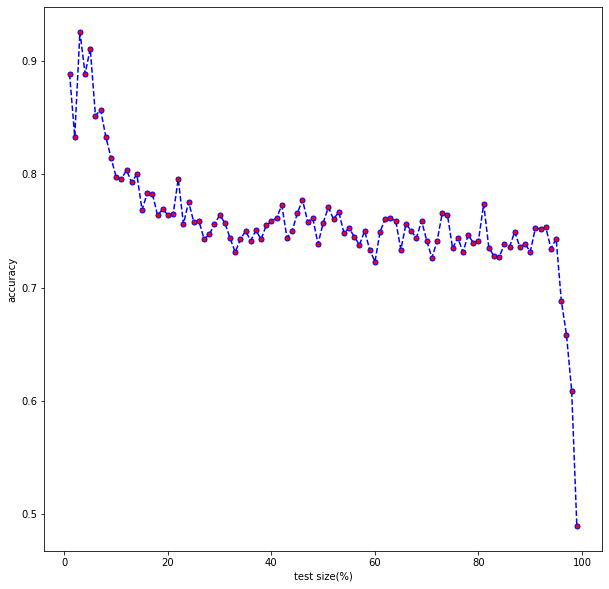

In [67]:
acc=[]
for i in range(1,100,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i/100,random_state=42)
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    accuracy=met.accuracy_score(y_test,y_pred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='b',linestyle='dashed',marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size(%)')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

## Random Forest Classifier
### Splitting data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
pd.DataFrame([x_train.shape , x_test.shape  , y_train.shape  ,  y_test.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,622,8.0
xtest,267,8.0
ytrain,622,NaN
ytest,267,NaN


### Scaling data

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Building the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=87)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

In [ ]:
y_test

### Model evaluation using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

In [ ]:
accuracy=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy*100)

In [ ]:
print("classification error is :",100*(1-accuracy))

In [ ]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

## Accuracy is 85.767%


In [ ]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i/100,random_state=0)
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=0)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=met.accuracy_score(y_test,y_pred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',marker='*',markerfacecolor='b',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

### From the above classification models,
### Random Forest classifier gave highest accuracy on randomly selected samples for a given test split.i.e; 85.767%